In [68]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)  # Adjust the configuration of the plots we will create

# Read in the data
df = pd.read_csv(r'C:\Users\User\Desktop\Homicide\child_homicide_original.csv')

In [69]:
df

,Entity,Code,Year,"Homicide rate per 100,000 population - Both Sexes - Age 0-19"
0,Albania,ALB,1987,0.212515
1,Albania,ALB,1988,0.497157
2,Albania,ALB,1989,0.427775
3,Albania,ALB,1992,0.508419
4,Albania,ALB,1993,1.464928
...,...,...,...,...
4579,Venezuela,VEN,2012,15.852173
4580,Venezuela,VEN,2013,13.967589
4581,Venezuela,VEN,2014,14.459981
4582,Venezuela,VEN,2015,16.893404


In [76]:
# 1 Checking Completeness of a data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Entity - 0.0%
Code - 0.0%
Year - 0.0%
Homicide rate per 100,000 population - Both Sexes - Age 0-19 - 0.0%


In [77]:
# Yes! The data is complete
# 2 Let's check if there are any duplicat rows

# Checking duplicates based on the given columns
# The duplicated method has a keep parameter that allows you to specify which duplicate to mark ('first', 'last', or False to mark all duplicates).
duplicates = df.duplicated(subset=['Entity', 'Code', 'Year'], keep = False)

# Display duplicate rows
duplicate_rows = df[duplicates]
if duplicate_rows.empty:
    print("No duplicates rows!")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

# If you want to drop duplicate rows, use the following line:
# df_no_duplicates = df.drop_duplicates()

# Display the dataframe after dropping duplicates
# print("\nDataFrame after dropping duplicates:")
# print(df_no_duplicates)



No duplicates rows!


In [97]:
# 3 Let's check the data types of clumns. I expect the Entity and Codes columns to be of type string 
df.dtypes

Entity                                                           object
Code                                                             object
Year                                                              int64
Homicide rate per 100,000 population - Both Sexes - Age 0-19    float64
dtype: object

In [98]:
# In pandas, an "object" type in a DataFrame refers to columns that contain string (text) or mixed data types. Here’s a more detailed explanation:
# String Data: Columns in pandas are often of type "object" when they contain strings. This includes columns that contain text data, such as names, 
# descriptions, or categorical variables represented as strings.
# Mixed Data Types: If a column contains a mixture of data types (e.g., strings, integers, floats), pandas will assign the "object" type to 
# accommodate all possible data types.

# So we good!
# 4 Let's drop rows with 0 in the Homicide Rate column
df = df[df['Homicide rate per 100,000 population - Both Sexes - Age 0-19'] != 0]
df

,Entity,Code,Year,"Homicide rate per 100,000 population - Both Sexes - Age 0-19"
0,Albania,ALB,1987,0.212515
1,Albania,ALB,1988,0.497157
2,Albania,ALB,1989,0.427775
3,Albania,ALB,1992,0.508419
4,Albania,ALB,1993,1.464928
...,...,...,...,...
4579,Venezuela,VEN,2012,15.852173
4580,Venezuela,VEN,2013,13.967589
4581,Venezuela,VEN,2014,14.459981
4582,Venezuela,VEN,2015,16.893404


In [99]:
# 5 I want to be able to display all rows and columns information.
# But, for the purposes of convenience while looking at the code later, I will comment them out.
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
pd.reset_option('^display.', silent=True)
df

,Entity,Code,Year,"Homicide rate per 100,000 population - Both Sexes - Age 0-19"
0,Albania,ALB,1987,0.212515
1,Albania,ALB,1988,0.497157
2,Albania,ALB,1989,0.427775
3,Albania,ALB,1992,0.508419
4,Albania,ALB,1993,1.464928
...,...,...,...,...
4579,Venezuela,VEN,2012,15.852173
4580,Venezuela,VEN,2013,13.967589
4581,Venezuela,VEN,2014,14.459981
4582,Venezuela,VEN,2015,16.893404


In [103]:
# 6 I forgot to rename the Homicide rate column. It is too long and inconvenient
df.rename(columns={'Entity': 'Country'}, inplace=True)
df.rename(columns={'Homicide rate per 100,000 population - Both Sexes - Age 0-19': 'Homicide Rate'}, inplace=True)
df

,Country,Code,Year,Homicide Rate
0,Albania,ALB,1987,0.212515
1,Albania,ALB,1988,0.497157
2,Albania,ALB,1989,0.427775
3,Albania,ALB,1992,0.508419
4,Albania,ALB,1993,1.464928
...,...,...,...,...
4579,Venezuela,VEN,2012,15.852173
4580,Venezuela,VEN,2013,13.967589
4581,Venezuela,VEN,2014,14.459981
4582,Venezuela,VEN,2015,16.893404


In [106]:
# 7 Let's ensure that numerical columns are in a consistent format (e.g., not mixed with text or special characters).
# This is a part of Data Cleaning
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Convert 'Homicide rate per 100,000 population - Both Sexes - Age 0-19' column to numeric
df['Homicide Rate'] = pd.to_numeric(df['Homicide Rate'], errors='coerce')

# let's check for missing data again
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))


Country - 0.0%
Code - 0.0%
Year - 0.0%
Homicide Rate - 0.0%


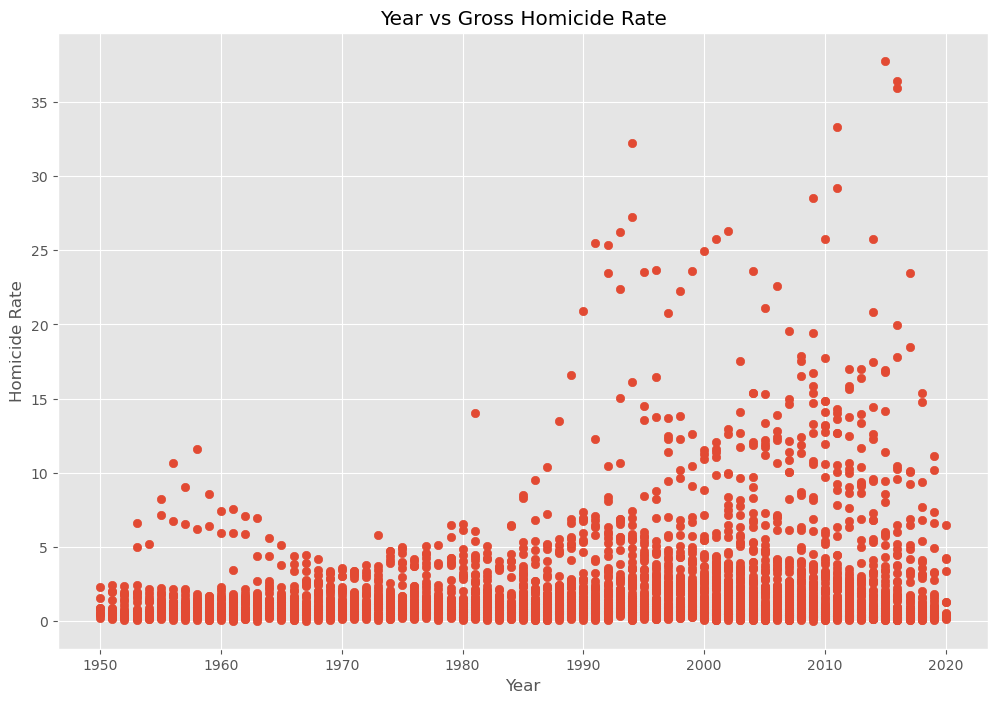

In [108]:
# Yes! There were no "unclean" data in the Year and Homicide Rate columns
# 8 Let's build a scatterplot to visually identify trends
# There migh be a correllation between Homicide Rate and Years (guess)
plt.scatter(x = df['Year'], y = df['Homicide Rate'])
plt.title('Year vs Gross Homicide Rate')
plt.xlabel('Year')
plt.ylabel('Homicide Rate')
plt.show()

<Axes: xlabel='Year', ylabel='Homicide Rate'>

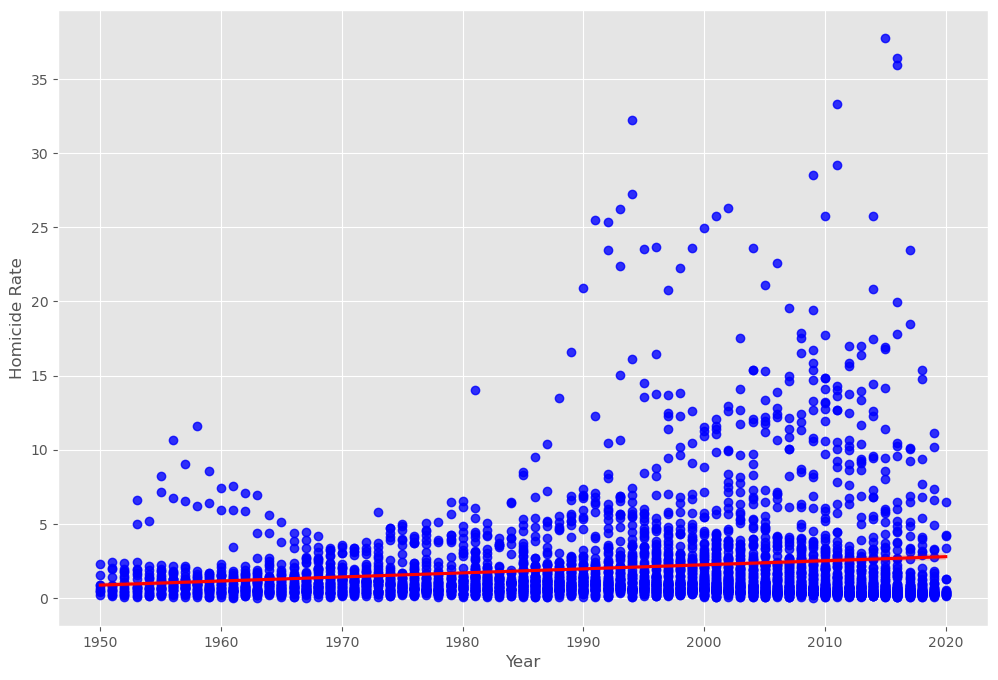

In [113]:
# It looks like in the recent 20-30 years, the Homicide Rate has steadily increased across the globe
# 9 Let's plot the Country vs Homicide Rate seaborn 
sns.regplot(x = 'Year', y = 'Homicide Rate', data = df, scatter_kws = {"color" : "blue"}, line_kws = {"color" : "red"})

In [115]:
# 10 Let's start looking at correlation
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr(method='pearson')
correlation_matrix
#Types of correlation: pearson(default), kendall, spearman

,Year,Homicide Rate
Year,1.000000,0.147117
Homicide Rate,0.147117,1.000000


In [120]:
# There is not that much correlation between year and homicide rate. 
# 11 Let's look at the correlation between countries and homicide rate
# I have converted the country names to codes to be able to work with int and float types to make the process
# of finding correlation easier
df_numerized = df.copy()
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized


,Country,Code,Year,Homicide Rate
0,0,0,1987,0.212515
1,0,0,1988,0.497157
2,0,0,1989,0.427775
3,0,0,1992,0.508419
4,0,0,1993,1.464928
...,...,...,...,...
4579,113,112,2012,15.852173
4580,113,112,2013,13.967589
4581,113,112,2014,14.459981
4582,113,112,2015,16.893404


In [125]:
df_numerized.dtypes

Country             int8
Code                int8
Year               int64
Homicide Rate    float64
dtype: object

In [128]:
correlation_matrix2 = df_numerized.corr(method='pearson')
correlation_matrix2
#Types of correlation: pearson(default), kendall, spearman

,Country,Code,Year,Homicide Rate
Country,1.000000,0.846460,-0.010209,-0.063220
Code,0.846460,1.000000,0.045244,0.035031
Year,-0.010209,0.045244,1.000000,0.147117
Homicide Rate,-0.063220,0.035031,0.147117,1.000000


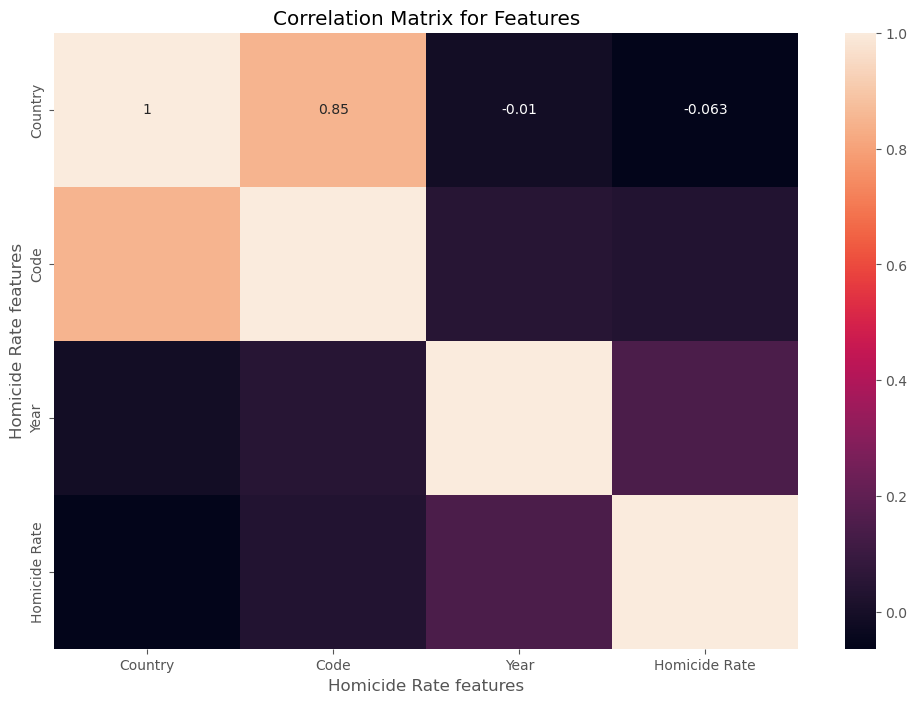

In [130]:
# Contrary to my expectations, there was not a correlation between Homicide Rate and Country.
# There is though a correlation between homizide rate and year
# 12 Let's visualize the correlation using a heatmap
sns.heatmap(correlation_matrix2, annot = True)
plt.title('Correlation Matrix for Features')
plt.xlabel('Homicide Rate features')
plt.ylabel('Homicide Rate features')
plt.show()

In [132]:
# Here is another way to look at correlation, just for demonstrating purposes
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

Country        Country          1.000000
               Code             0.846460
               Year            -0.010209
               Homicide Rate   -0.063220
Code           Country          0.846460
               Code             1.000000
               Year             0.045244
               Homicide Rate    0.035031
Year           Country         -0.010209
               Code             0.045244
               Year             1.000000
               Homicide Rate    0.147117
Homicide Rate  Country         -0.063220
               Code             0.035031
               Year             0.147117
               Homicide Rate    1.000000
dtype: float64

In [134]:
# Conclusion: There is no need to look at the correlation between identical features. For example: Code vs Code, Country vs Code
# The only correlation we were able to determine is Homicide Rate vs Year.
# Indeed, by looking at the red scatterplot above, we can see that the rate of Child Homicide Rate increased in the later years starting from 1990

In [138]:
# Additionally, we should create a cleaned data version of the original data.
new_csv_path = r'C:\Users\User\Desktop\Homicide\child_homicide_modified.csv'
df.to_csv(new_csv_path, index=False)

In [139]:
new_csv_path2 = r'C:\Users\User\Desktop\Homicide\child_homicide_numerized.csv'
df_numerized.to_csv(new_csv_path2, index=False)